In [1]:
#@title Import Relevant Libraries
import pandas as pd
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

print('Imported libraries')

Imported libraries


In [2]:
#@title create model

def create_model(my_learning_rate, my_feature_layer):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(my_feature_layer)

  # Describe the topography of the model by calling the tf.keras.layers.Dense
  # method once for each layer. We've specified the following arguments:
  #   * units specifies the number of nodes in this layer.
  #   * activation specifies the activation function (Rectified Linear Unit).
  #   * name is just a string that can be useful when debugging.

  # Define the first hidden layer with 20 nodes.   
  model.add(tf.keras.layers.Dense(units=25, 
                                  activation='relu', 
                                  name='Hidden1'))
    
  model.add(tf.keras.layers.Dropout(rate=0.25))
  
  # Define the second hidden layer with 12 nodes. 
  model.add(tf.keras.layers.Dense(units=15, 
                                  activation='relu', 
                                  name='Hidden2'))
  
  # Define the output layer.
  model.add(tf.keras.layers.Dense(units=1,  
                                  name='Output'))                              
  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])

  return model

print('Defined Model Creator')

Defined Model Creator


In [3]:
#@title create model trainer

def train_model(model, features_df, label_df, epochs, label_name,
                batch_size=None):
  """Train the model by feeding it data."""

  # Split the dataset into features and label.
  features = {name:np.array(value) for name, value in features_df.items()}
  label = label_df.to_numpy()
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True) 

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # To track the progression of training, gather a snapshot
  # of the model's mean squared error at each epoch. 
  hist = pd.DataFrame(history.history)
  mse = hist["mean_squared_error"]

  return epochs, mse

print('Defined model trainer')

Defined model trainer


In [4]:
#@title Define the plotting function.

def plot_the_loss_curve(epochs, mse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Mean Squared Error")

  plt.plot(epochs, mse, label="Loss")
  plt.legend()
  plt.ylim([mse.min()*0.95, mse.max() * 1.03])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


In [5]:
def plot_confusion_matrix(labels_test,pred):
    cnf_matrix=confusion_matrix(labels_test,pred)
    print("Accuracy : {}", accuracy_score(labels_test,pred))
    print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    print("ROC", roc_auc_score(labels_test, pred))
    fig= plt.figure(figsize=(6,3))
    print("TP",cnf_matrix[1,1,])
    print("TN",cnf_matrix[0,0])
    print("FP",cnf_matrix[0,1]) 
    print("FN",cnf_matrix[1,0]) 
    
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_test,pred))

In [6]:
def data_prep(X,y, num):
    X = X
    y = y
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=num,random_state=42, stratify = y)
    print("========== panjang X train ==========")
    print(str(len(X_train)))
    print("========== panjang X test ===========")
    print(str(len(X_test)))
    return X_train, X_test, y_train, y_test

In [7]:
#@title Extract dataframe from csv
df_raw = pd.read_csv(filepath_or_buffer="./Dataset/credit_train_2.csv")
df_raw = df_raw.reindex(np.random.permutation(df_raw.index))


print('Extracted data from csv')

Extracted data from csv


In [8]:

print("############ DATA_INFO #############")
df_raw.info()

############ DATA_INFO #############
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100514 entries, 55853 to 22081
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   loan_id                       100000 non-null  object 
 1   customer_id                   100000 non-null  object 
 2   loan_status                   100000 non-null  object 
 3   current_loan_amount           100000 non-null  float64
 4   term                          100000 non-null  object 
 5   credit_score                  80846 non-null   float64
 6   annual_income                 80846 non-null   float64
 7   years_in_current_job          95778 non-null   object 
 8   home_ownership                100000 non-null  object 
 9   purpose                       100000 non-null  object 
 10  monthly_debt                  100000 non-null  float64
 11  years_of_credit_history       100000 non-null  float64
 12  mont

In [9]:

df_raw = df_raw[df_raw['credit_score'].notna()]
df_raw = df_raw[df_raw['annual_income'].notna()]
df_raw = df_raw[df_raw['bankruptcies'].notna()]
df_raw = df_raw[df_raw['tax_liens'].notna()]
df_raw = df_raw[df_raw['years_in_current_job'].notna()]
df_raw = df_raw[df_raw['maximum_open_credit'].notna()]
df_raw['months_since_last_delinquent'].fillna(value=0, inplace=True)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77271 entries, 55853 to 22081
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   loan_id                       77271 non-null  object 
 1   customer_id                   77271 non-null  object 
 2   loan_status                   77271 non-null  object 
 3   current_loan_amount           77271 non-null  float64
 4   term                          77271 non-null  object 
 5   credit_score                  77271 non-null  float64
 6   annual_income                 77271 non-null  float64
 7   years_in_current_job          77271 non-null  object 
 8   home_ownership                77271 non-null  object 
 9   purpose                       77271 non-null  object 
 10  monthly_debt                  77271 non-null  float64
 11  years_of_credit_history       77271 non-null  float64
 12  months_since_last_delinquent  77271 non-null  float64
 1

In [10]:
df_raw.drop(['loan_id', 'customer_id'], axis = 1, inplace=True)
df_raw['loan_status'].replace({'Charged Off':0, 'Fully Paid':1}, inplace=True)
df_raw['term'].replace({'Short Term':0, 'Long Term':1}, inplace=True)
df_raw['years_in_current_job'].replace({'< 1 year':0,
                                          '1 year':1,
                                          '2 years':2,
                                          '3 years':3,
                                          '4 years':4,
                                          '5 years':5,
                                          '6 years':6,
                                          '7 years':7,
                                          '8 years':8,
                                          '9 years':9,
                                          '10+ years': 10},
                                        inplace=True)
df_raw['home_ownership'].replace({'HaveMortgage':1,
                                    'Home Mortgage':2,
                                    'Own Home':3,
                                    'Rent':4},
                                  inplace=True)
df_raw['purpose'].replace({'Business Loan':1,
                             'Buy a Car':2,
                             'Buy House':3,
                             'Debt Consolidation':4,
                             'Educational Expenses':5,
                             'Home Improvements':6,
                             'major_purchase':7,
                             'Medical Bills':8,
                             'moving':9,
                             'renewable_energy':10,
                             'small_business':11,
                             'Take a Trip':12,
                             'vacation':13,
                             'wedding':14,
                             'other':15,
                             'Other':15},
                           inplace=True)
df_raw.head()

,loan_status,current_loan_amount,term,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
55853,1,443872.0,0,735.0,2875080.0,10,4,11,9679.36,16.0,6.0,6.0,1.0,125970.0,253220.0,1.0,0.0
13564,1,167002.0,0,697.0,576897.0,1,4,4,12547.60,8.2,0.0,12.0,0.0,138244.0,300322.0,0.0,0.0
46348,1,266530.0,0,725.0,1649694.0,10,2,4,26394.99,15.1,0.0,13.0,0.0,775067.0,1256926.0,0.0,0.0
20117,1,516692.0,0,740.0,3049310.0,2,2,4,19591.85,25.3,0.0,11.0,0.0,311258.0,447700.0,0.0,0.0
6912,1,446512.0,1,725.0,1245507.0,7,4,4,4712.19,18.5,0.0,5.0,0.0,148067.0,204094.0,0.0,0.0


In [11]:

df_raw.describe()


,loan_status,current_loan_amount,term,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
count,77271.000000,7.727100e+04,77271.000000,77271.000000,7.727100e+04,77271.000000,77271.000000,77271.000000,77271.000000,77271.000000,77271.000000,77271.000000,77271.000000,7.727100e+04,7.727100e+04,77271.000000,77271.000000
mean,0.790167,1.454562e+07,0.291623,1071.759392,1.399186e+06,5.911066,2.934231,5.215204,18755.666828,17.983421,16.427780,11.201020,0.164641,2.975654e+05,7.395510e+05,0.114299,0.029196
std,0.407192,3.486935e+07,0.454513,1466.273187,1.094465e+06,3.630256,0.956108,3.352429,12292.178511,6.796231,23.001615,5.037004,0.481352,3.845754e+05,7.038667e+06,0.347270,0.262642
min,0.000000,1.542200e+04,0.000000,585.000000,7.662700e+04,0.000000,1.000000,1.000000,0.000000,3.700000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.000000,1.931490e+05,0.000000,705.000000,8.625050e+05,3.000000,2.000000,4.000000,10478.500000,13.400000,0.000000,8.000000,0.000000,1.143515e+05,2.746260e+05,0.000000,0.000000
50%,1.000000,3.269640e+05,0.000000,724.000000,1.202263e+06,6.000000,3.000000,4.000000,16475.280000,16.800000,0.000000,10.000000,0.000000,2.127240e+05,4.697000e+05,0.000000,0.000000
75%,1.000000,5.530800e+05,1.000000,741.000000,1.677339e+06,10.000000,4.000000,4.000000,24302.330000,21.500000,30.000000,14.000000,0.000000,3.712695e+05,7.839040e+05,0.000000,0.000000
max,1.000000,1.000000e+08,1.000000,7510.000000,1.655574e+08,10.000000,4.000000,15.000000,435843.280000,70.500000,176.000000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [12]:
array = df_raw.values
arr_x = array[3:,3:]
arr_y = array[3:,2]
arr_y = arr_y.astype(int)

In [13]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(arr_x, arr_y)
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(arr_x)
print(features[0:5,:])

[2.037e+05 4.256e+08 8.051e+02 3.390e+02 6.529e+02 1.518e+07 4.912e+02
 1.634e+02 1.150e+03 5.784e+01 4.049e+08 5.211e+08 5.488e+01 2.052e+00]
[[3049310.     19591.85  311258.    447700.  ]
 [1245507.      4712.19  148067.    204094.  ]
 [1897530.     19133.38  585998.   1600280.  ]
 [1604835.     29555.64  401755.    691218.  ]
 [1745568.     28511.02  655006.   1369016.  ]]


# Highest scores: Current Loan Amount, Credit Score, Annual Income, Maximum Open Credit

In [14]:
# df_train_mean = df_train.mean()
# df_train_std = df_train.std()
# df_train_norm = (df_train - df_train_mean) / df_train_std

In [15]:
feature_columns = []
current_loan_amount = tf.feature_column.numeric_column('current_loan_amount')
feature_columns.append(current_loan_amount)
credit_score = tf.feature_column.numeric_column('credit_score')
feature_columns.append(credit_score)
annual_income = tf.feature_column.numeric_column('annual_income')
feature_columns.append(annual_income)
max_open_credit = tf.feature_column.numeric_column('maximum_open_credit')
feature_columns.append(max_open_credit)

my_feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [16]:
print(df_raw.copy()['loan_status'])

55853    1
13564    1
46348    1
20117    1
6912     1
        ..
65568    1
30139    1
10835    1
40720    1
22081    1
Name: loan_status, Length: 77271, dtype: int64


In [34]:
X = df_raw.copy().drop(['loan_status'], axis=1)
y = df_raw.copy()['loan_status']
X_train, X_test, y_train, y_test = data_prep(X,y,0.25)
print()
print(X_test)
print("================")
print(X_train)

========== panjang X train ==========
57953
========== panjang X test ===========
19318

       current_loan_amount  term  credit_score  annual_income  \
41866             444840.0     0         737.0      1152540.0   
6421              254408.0     0         720.0      1528512.0   
14438             616990.0     1         728.0      1960135.0   
85587             176264.0     0         719.0       570855.0   
4527              559526.0     0         731.0      1642949.0   
...                    ...   ...           ...            ...   
99396             119526.0     0         725.0      1415367.0   
42652             571098.0     1         683.0      1124040.0   
21951           99999999.0     0         700.0      1027653.0   
43664             653994.0     0         725.0      1430852.0   
55426             368918.0     1         683.0      1068275.0   

       years_in_current_job  home_ownership  purpose  monthly_debt  \
41866                    10               4        4       9

Train on 57953 samples
Epoch 1/20
57953/57953 [==============================] - 3s 45us/sample - loss: 39421206936835.2266 - mean_squared_error: 39421206331392.0000
Epoch 2/20
57953/57953 [==============================] - 1s 11us/sample - loss: 502355.4359 - mean_squared_error: 502355.5000
Epoch 3/20
57953/57953 [==============================] - 1s 12us/sample - loss: 3610078.4494 - mean_squared_error: 3610078.5000
Epoch 4/20
57953/57953 [==============================] - 1s 12us/sample - loss: 1627.8703 - mean_squared_error: 1627.8704
Epoch 5/20
57953/57953 [==============================] - 1s 11us/sample - loss: 165303.2752 - mean_squared_error: 165302.8438
Epoch 6/20
57953/57953 [==============================] - 1s 12us/sample - loss: 10582.9745 - mean_squared_error: 10582.9736
Epoch 7/20
57953/57953 [==============================] - 1s 11us/sample - loss: 1645.2354 - mean_squared_error: 1645.2356
Epoch 8/20
57953/57953 [==============================] - 1s 11us/sample - loss:

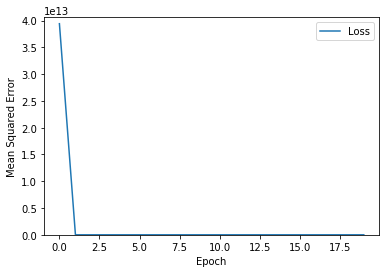

In [18]:
# The following variables are the hyperparameters.
learning_rate = 0.03
epochs = 20
batch_size = 1000

# Specify the label
label_name = 'loan_status'

# Establish the model's topography.
my_model = create_model(learning_rate, my_feature_layer)

# Train the model on the normalized training set. We're passing the entire
# normalized training set, but the model will only use the features
# defined by the feature_layer.
epochs, mse = train_model(my_model, X_train, y_train, epochs, label_name, batch_size)
plot_the_loss_curve(epochs, mse)

In [33]:
threshold = 0.5
X_test = np.array(X_test)
print(X_train.shape)
print(X_test.shape)
y_pred = my_model.predict(X_test)
y_pred = [int(1) if x>threshold else int(0) for x in y_pred]

y_test = y_test.astype('int')
plot_confusion_matrix(y_test, y_pred)

(57953, 16)
(19318, 16)


ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 16 array(s), but instead got the following list of 1 arrays: [array([[4.448e+05, 0.000e+00, 7.370e+02, ..., 1.001e+06, 0.000e+00,
        0.000e+00],
       [2.544e+05, 0.000e+00, 7.200e+02, ..., 1.106e+05, 0.000e+00,
        0.000e+00],
       [6.170e+05, 1.00...